<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/Oil_Spill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAR Application: Oil Spills
### I. How to create SAR quicklook images of oil spills? 

* Useful Products: HH/VV backscatter ratio
* Useful Wavelengths: HH, VV
* Instructions to View: Convert to decibels (dB) and create a HH/VV ratio. "The co-polarized ratio, σ0HH/σ0VV, readily distinguishes oil from water" (Minchew and Jones 2012).

### II. How to interpret SAR images of oil spills?
SAR can be used to help discriminate oil from the water surface. Questions of interest after an oil spill include: where is the oil? How much oil is there? What is the oil's trajectory?

When oil is present, it can smooth out the ocean's capillary waves and reduce the radar backscatter relative to the surrounding ocean. As a result, oil appears darker to the radar as less signal is reflected back to the sensor. This allows the radar to detect differences between thick oil and the ocean surface.



## SAR Example: Gulf Coast Deep Horizon Oil Spill & North Sea Oil Spill

The Deep Horizon Oil Spill released 4 million barrels of oil into the Gulf of Mexico between April 20, 2010 and July 15, 2010. The Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR) L-band polarimetric SAR was deployed to the Gulf of Mexico from June 22–23, 2010, to collect data for scientific studies of the main oil slick and the extent and impact of oil on coastal marshlands.

The North Sea Oil Spill is from Norway's NOFO's, the Norwegian Clean Seas Association for Operating Companies, oil spill cleanup simulations in the North Sea. In 2015, the exercise occured June 8th through June 11th, and UAVSAR flew over the oil-slicked area to detect the presence and depth of oil. 

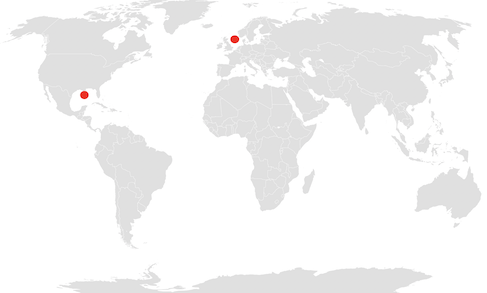

<a name="s1"></a>
## 1. Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font> 

### Python Packages:  
This routine uses several python libaries. Some are already included in the Google Colab environment and others are installed and imported in the cell below. Downloading new python packages to this environment may take a few seconds to complete.

<font color='red'> 1. Run cell below </font> 

In [1]:
!pip install rasterio --quiet

import rasterio as rio          # Read and write geospatial raster data
import math                     # Access to mathematical functions
import numpy as np              # Numeric and mathematic functions
import matplotlib.pyplot as plt # Plotting, making graphs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 44.7 MB/s eta 0:00:00


### Download the Data

Download UAVSAR geotiffs from an external page with wget. The original UAVSAR data have been converted to geotiff and cropped to a smaller area of interest.

<font color='red'> 2. Run cell below </font> 

In [2]:
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_14010_100623_HH_lsubset.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_14010_100623_HH_usubset.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_14010_100623_VV_lsubset.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_14010_100623_VV_usubset.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_000_HH.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_000_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_000_VV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_008_HH.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_008_VV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_014_HH.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_014_VV.tif --quiet


<a name="s2"></a>
## 2. Deep Horizon Oil Spill

### UAVSAR data product pages: 

GOMoil_07601: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=GOMoil_07601_10052_102_100622_L090_CX_01#data

GOMoil_14201: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=GOMoil_14201_10053_000_100622_L090_CX_01#data

gulfco_14010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=gulfco_14010_10054_100_100623_L090_CX_05#data

gulfco_32010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=gulfco_32010_10054_101_100623_L090_CX_04#data

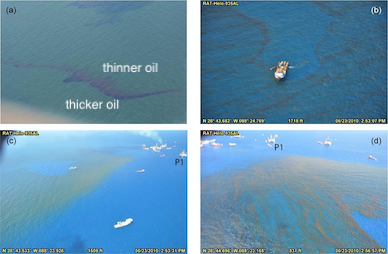

Image: Samples of aerial photography of the DWH oil spill taken on June 23, 2010 (Minchew and Jones 2012)

<a name="s3"></a>
## 3. Deep Horizon Oil Spill: Plot HH and VV UAVSAR dB Images
Read in UAVSAR geotiffs and convert to decibels (dB).

<font color='red'> 3. Run cell below </font> 

In [3]:
def read_file(path):
    with rio.open(path) as ds:
        band = ds.read(1)
    return band

def convert_db_v1(data):
    db = 10*(math.log10(data))
    return db

convert_db = np.vectorize(convert_db_v1)

## gulfco_14010 split into upper and lower segments
## l for "lower" and is a oil spill streak
## u for "upper" and is a denser oil spill
gulfco_14010_HH_l = read_file('gulfco_14010_100623_HH_lsubset.tif')
gulfco_14010_HH_u = read_file('gulfco_14010_100623_HH_usubset.tif')
gulfco_14010_VV_l = read_file('gulfco_14010_100623_VV_lsubset.tif')
gulfco_14010_VV_u = read_file('gulfco_14010_100623_VV_usubset.tif')

## Convert to decibels
gulfco_14010_HH_l_db = convert_db(gulfco_14010_HH_l)
gulfco_14010_VV_l_db = convert_db(gulfco_14010_VV_l)
gulfco_14010_HH_u_db = convert_db(gulfco_14010_HH_u)
gulfco_14010_VV_u_db = convert_db(gulfco_14010_VV_u)

Plot a subset of UAVSAR data over the oil spill in VV, HH, and HH/VV.

The influence of incidence angle is evident with the visible gradient of values across the swath. The white dots in the images are oil platforms and facilities.

<font color='red'> 4. Run cell below </font> 

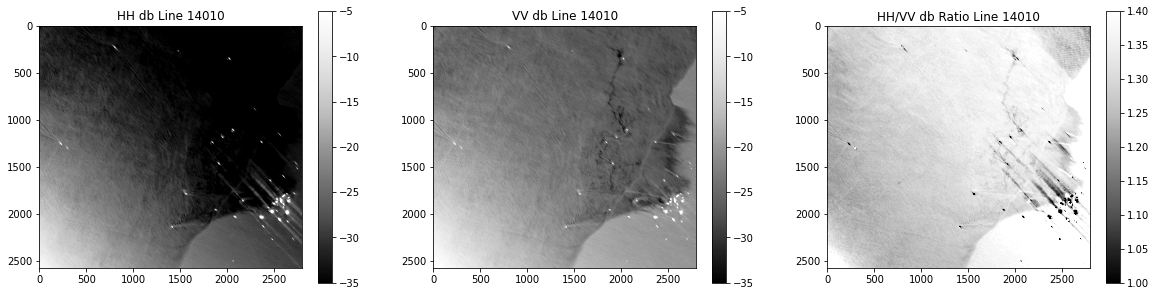

In [14]:
## Plot UAVSAR Gulf Coast line 14010
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# fig.colorbar(HH_14010, ax=ax[0])
HH_14010 = ax[0].imshow(gulfco_14010_HH_l_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[0].set_title('HH db Line 14010')
fig.colorbar(HH_14010, ax=ax[0])

# fig.colorbar(VV_14010, ax=ax[1])
VV_14010 = ax[1].imshow(gulfco_14010_VV_l_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[1].set_title('VV db Line 14010')
fig.colorbar(VV_14010, ax=ax[1])

ratio_14010 = gulfco_14010_HH_l_db/gulfco_14010_VV_l_db
# fig.colorbar(HH_VV_14010, ax=ax[0,2])
HH_VV_14010 = ax[2].imshow(ratio_14010, vmin=1, vmax=1.4, cmap="Greys_r")
ax[2].set_title('HH/VV db Ratio Line 14010')
fig.colorbar(HH_VV_14010, ax=ax[2])


<a name="s4"></a>
## 4. North Sea Oil Spill: Plotting HH and VV UAVSAR dB Images

norway_00709 flight 15901

UAVSAR data product page:

Data Take 000: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15092_000_150610_L090_CX_02#data

Data Take 008: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15091_008_150610_L090_XX_02#data

Data Take 014: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15091_014_150610_L090_CX_01#data


<font color='red'> 5. Run cell below </font> 

In [9]:
## norway
## Read in Files
norway_000_HH = read_file('norway_2015_000_HH.tif')
norway_000_VV = read_file('norway_2015_000_VV.tif')
norway_000_HV = read_file('norway_2015_000_HV.tif')

norway_008_HH = read_file('norway_2015_008_HH.tif')
norway_008_VV = read_file('norway_2015_008_VV.tif')

norway_014_HH = read_file('norway_2015_014_HH.tif')
norway_014_VV = read_file('norway_2015_014_VV.tif')

## Convert to decibels
norway_000_HH_db = convert_db(norway_000_HH)
norway_000_VV_db = convert_db(norway_000_VV)
norway_000_HV_db = convert_db(norway_000_HV)
norway_008_HH_db = convert_db(norway_008_HH)
norway_008_VV_db = convert_db(norway_008_VV)
norway_014_HH_db = convert_db(norway_014_HH)
norway_014_VV_db = convert_db(norway_014_VV)

## Make HH/VV ratio
ratio_000 = norway_000_HH_db/norway_000_VV_db
ratio_008 = norway_008_HH_db/norway_008_VV_db
ratio_014 = norway_014_HH_db/norway_014_VV_db

Plot the three polarizations.

<font color='red'> 7. Run cell below </font> 

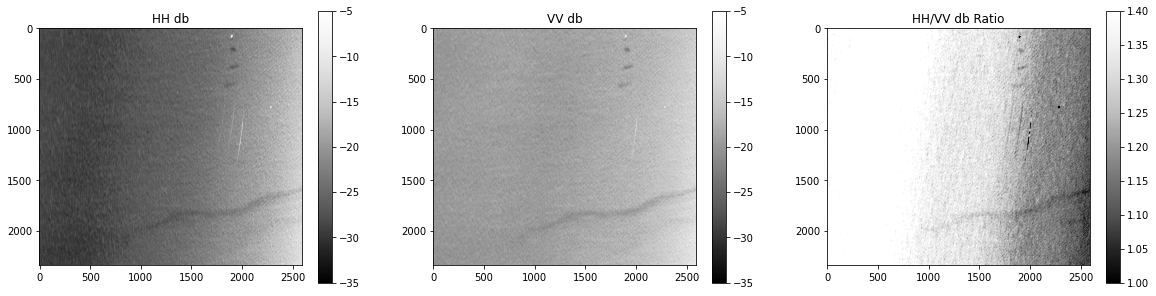

In [13]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

HH_norway = ax[0].imshow(norway_000_HH_db, vmin=-35, vmax=-5, cmap="Greys_r") #-35, -5
ax[0].set_title('HH db')
fig.colorbar(HH_norway, ax=ax[0])

VV_norway = ax[1].imshow(norway_000_VV_db, vmin=-35, vmax=-5, cmap="Greys_r") #-25, -5
ax[1].set_title('VV db')
fig.colorbar(VV_norway, ax=ax[1])

ratio_14010 = norway_000_HH_db/norway_000_VV_db
ratio_norway = ax[2].imshow(ratio_14010, vmin=1, vmax=1.4, cmap="Greys_r")
ax[2].set_title('HH/VV db Ratio')
fig.colorbar(ratio_norway, ax=ax[2])

The different polarizations of the first UAVSAR datatake over the oil spill in Norway. These polarizations have differences in their dB ranges over the ocean and oil spill area. HV has the lowest dB values, then HH, and VV with the highest range. 

<font color='red'> 6. Run cell below </font> 

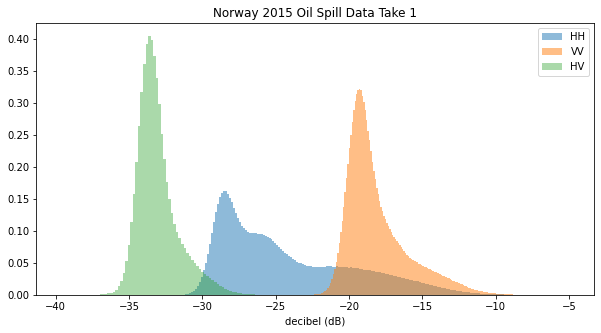

In [15]:
n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(norway_000_HH_db.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='HH')
ax.hist(np.clip(norway_000_VV_db.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='VV')
ax.hist(np.clip(norway_000_HV_db.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='HV')
ax.set_title('Norway 2015 Oil Spill Data Take 1')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')

plt.show()

<a name="s5"></a>

## 5. North Sea Oil Spill: Oil movement during data collection flight

UAVSAR collected multiple data over the oil spill in Norway on June 10, 2015 to capture the movement of the oil on the surface of water throughout the day. Can see the oil spill dispersing and moving south.

Data Take 1 was acquired at 10-Jun-2015 05:32:57 UTC

Data Take 8 was acquired at 10-Jun-2015 07:17:47 UTC

Data Take 14 was acquired at 10-Jun-2015 08:37:54 UTC

<font color='red'> 8. Run cell below </font> 

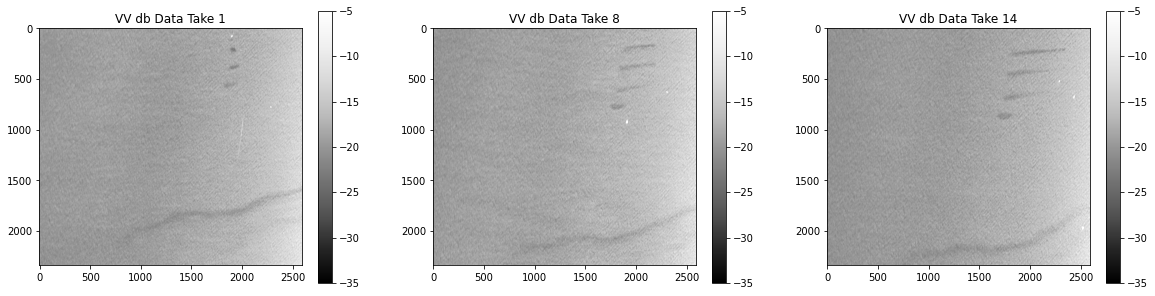

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ratio_1 = ax[0].imshow(norway_000_VV_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[0].set_title('VV db Data Take 1')
fig.colorbar(ratio_1, ax=ax[0])

ratio_8 = ax[1].imshow(norway_008_VV_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[1].set_title('VV db Data Take 8')
fig.colorbar(ratio_8, ax=ax[1])

ratio_14 = ax[2].imshow(norway_014_VV_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[2].set_title('VV db Data Take 14')
fig.colorbar(ratio_14, ax=ax[2])

## Incidence Angle
Can see impact of incidence angles in the range direction.
To correct, convert to gamma by dividing the UAVSAR geotiffs by the cos(local incidence angle).

## Other Resources

UAVSAR Deployment Page for the Gulf Coast Oil Spill: https://uavsar.jpl.nasa.gov/cgi-bin/deployment.pl?id=L20100622

UAVSAR Maps the Gulf Coast Oil Spill: https://www.jpl.nasa.gov/images/uavsar-maps-the-gulf-coast-oil-spill

UAVSAR data download page: https://uavsar.jpl.nasa.gov/cgi-bin/data.pl

UAVSAR website: https://uavsar.jpl.nasa.gov

## References

Minchew, B., Jones, C.E. Holt, B. (2012). Polarimetric Analysis of Backscatter From the Deepwater Horizon Oil Spill Using L-Band Synthetic Aperture Radar. IEEE Transactions on Geoscience and Remote Sensing 50, 38123830. DOI: 10.1109/TGRS.2012.2185804;


Studies of the Deepwater Horizon Oil Spill With the UAVSAR Radar: http://www.mit.edu/~minchew/pubs/pdfs/Jones_DWHwithUAVSAR_AGUmonograph.pdf

Others:

Chaudhary, V. Kumar, S. (2020). Marine oil slicks detection using spaceborne and airborne SAR data. Advances in Space Research. DOI: 10.1016/j.asr.2020.05.003

Collins, M.J., Denbina, M., Minchew, B., Jones, C.E. Holt, B. (2015). On the Use of Simulated Airborne Compact Polarimetric SAR for Characterizing Oil-Water Mixing of the Deepwater Horizon Oil Spill. IEEE J. Sel. Top. Appl. Earth Observations Remote Sensing 8, 1062-1077. DOI: 10.1109/JSTARS.2015.2401041

Genovez, P., Jones, C., Santa-Anna, S. Freitas, C. (2019). Oil Slick Characterization Using a Statistical Region-Based Classifier Applied to UAVSAR Data. Journal of Marine Science and Engineering 7, 36. DOI: 10.3390/jmse7020036

Jones, C.E., Minchew, B., Holt, B. Hensley, S. (2011). Studies of the Deepwater Horizon Oil Spill With the UAVSAR Radar. Geophysical Monograph Series 3350. DOI: 10.1029/2011GM001113

Latini, D., Del Frate, F. Jones, C.E. (2016). Multi-frequency and polarimetric quantitative analysis of the Gulf of Mexico oil spill event comparing different SAR systems. Remote Sensing of Environment 183, 2642. DOI: 10.1016/j.rse.2016.05.014

Li, H., Perrie, W. Wu, J. (2019). Retrieval of Oil-Water Mixture Ratio at Ocean Surface Using Compact Polarimetry Synthetic Aperture Radar. Remote Sensing 11, 816. DOI: 10.3390/rs11070816

Marinoni, A., Espeseth, M.M., Gamba, P., Brekke, C. Eltoft, T. (2019). Assessment of Polarimetric Variability by Distance Geometry for Enhanced Classification of Oil Slicks Using SAR. Geoscience and Remote Sensing (IGARSS), IEEE International Symposium, Yokohama, Japan DOI: 10.1109/IGARSS.2019.8899247


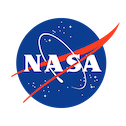

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2021. California Institute of Technology. Government sponsorship acknowledged. 